<a href="https://colab.research.google.com/github/DannMacias/customer-segmentation/blob/main/02_eda_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Customer segmentation (part 2): Exploratory Data Analysis 📊 </b>

After cleaning the dataset and performing feature engineering (see [notebook 1](https://github.com/DannMacias/customer-segmentation/blob/e4cc1de5f17b6f2eb5421921b4640b8c1ccfd0d7/01_data_cleaning_feature_engineering_customer_segmentation.ipynb)), I will now perform an exploratory analysis of the data. 

The goal is to find the features that can be used in the clustering to get the best performance (in future notebooks I will use all features, but with a reduction in dimensions).

# 0. Getting setup

In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
# Get the clean data from GitHub repo
data_path = "https://github.com/DannMacias/customer-segmentation/raw/main/clean_customer_analysis_database.csv"
df = pd.read_csv(data_path)
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Response,Total_Spent,Age,Seniority,Partner,Num_Childer,Num_Childen,Num_Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,1,1617,57,971,Alone,0,0,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,27,60,125,Alone,2,2,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,776,49,472,Partner,0,0,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,53,30,65,Partner,1,1,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,422,33,321,Partner,1,1,1,3,1


# 1. Univariate analysis

## Age of the customers

In [ ]:
# Basic statistics for Age
df["Age"].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

The average age of the customers is 45, with a standard deviation of 11.9 years. The minimum age in the database is 18 and the maximum age is 121 (an outlier).

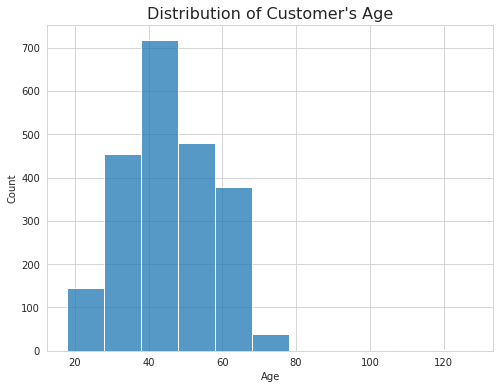

In [ ]:
# Plot a histogram of Age
plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "Age", binwidth = 10)
plt.title("Distribution of Customer's Age", fontsize = 16);

It's seen that most of the customer's age distribution is within the range 30 - 50.

## Income

In [ ]:
# Basic statistic of Income
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

The average annual income is 52,000 with a standard deviation of 25,000 (a high variability), the minimum is 1,700 and the maximum is 600,000.

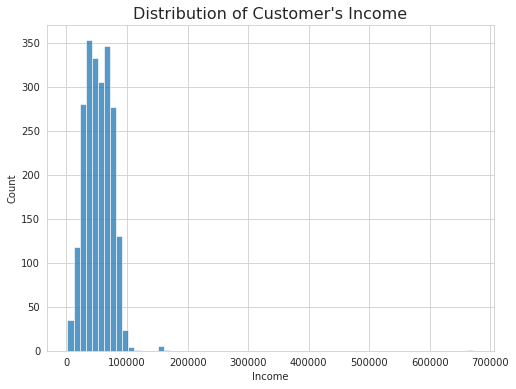

In [ ]:
# Plot histogram of Income
plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "Income", binwidth = 10_000)
plt.title("Distribution of Customer's Income", fontsize = 16);

The majority of customer's income is within 30-100k$.

## Education

In [ ]:
# Education in customer's
df["Education"].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

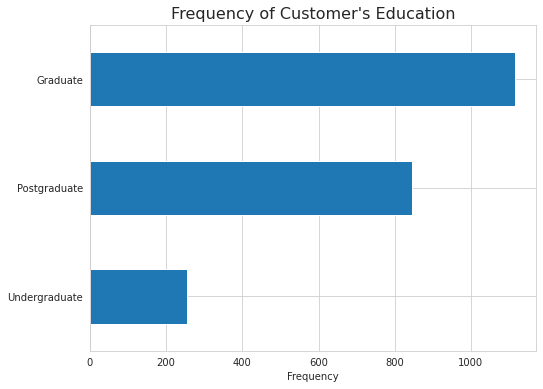

In [ ]:
# Plot the Education counts
df["Education"].value_counts().sort_values(ascending = True).plot.barh(figsize = (8, 6))
plt.xlabel("Frequency")
plt.title("Frequency of Customer's Education", fontsize = 16);

In [ ]:
# Proportion of Customer's Education
df["Education"].value_counts(normalize = True).sort_values(ascending = False)

Graduate         0.503610
Postgraduate     0.381769
Undergraduate    0.114621
Name: Education, dtype: float64

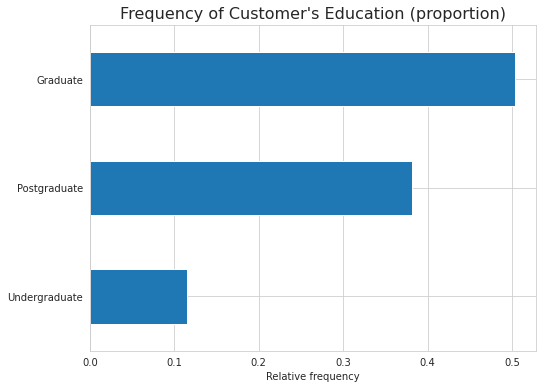

In [ ]:
# Plot the Proportion of Customer's Education
df["Education"].value_counts(normalize = True).sort_values(ascending = True).plot.barh(figsize = (8, 6))
plt.xlabel("Relative frequency")
plt.title("Frequency of Customer's Education (proportion)", fontsize = 16);

Fifty percent of the customers are graduates students, followed by post-graduates (Master's and PhD) at 38%.

## Total Amount Spent

In [ ]:
# Basic statistics of Total_Spent
df["Total_Spent"].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Total_Spent, dtype: float64

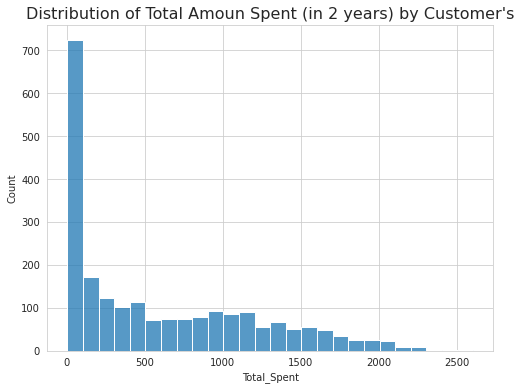

In [ ]:
# Distribution of Total_Spent
plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "Total_Spent", binwidth = 100)
plt.title("Distribution of Total Amoun Spent (in 2 years) by Customer's", fontsize = 16);

The average spend (in 2 years) is 600, with a standard deviation of 600 (very high). The vast majority of the customers spend an amount between 0 and 100.

The distribution of spend shows that while the vast majority spend less than 100, there is a lot of variability, with people spending 500 or 1100 in two years.

## Seniority

In [ ]:
# Basic statistics of Seniority (data in days)
df["Seniority"].describe()

count    2216.000000
mean      512.006318
std       232.469034
min         0.000000
25%       340.000000
50%       513.000000
75%       686.000000
max      1063.000000
Name: Seniority, dtype: float64

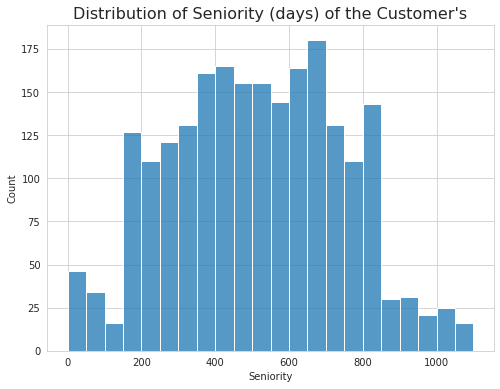

In [ ]:
# Distribution of Seniority
plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "Seniority", binwidth = 50)
plt.title("Distribution of Seniority (days) of the Customer's", fontsize = 16);

In terms of seniority (number of days from the first to last purchase), the average is 512 days, with a standard deviation of 232 days. The majority of customers have been with the company between 500 and 650 days.

## Partner (marital status)

In [ ]:
# Partner (marital status) of Customer's
df["Partner"].value_counts()

Partner    1430
Alone       786
Name: Partner, dtype: int64

In [ ]:
# Proportion of Customer's Partner
df["Partner"].value_counts(normalize = True).sort_values(ascending = False)

Partner    0.645307
Alone      0.354693
Name: Partner, dtype: float64

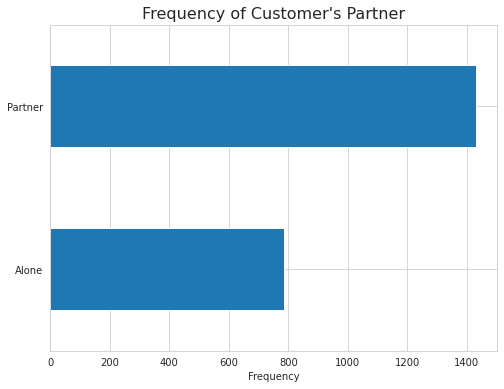

In [ ]:
# Plot the Partner counts
df["Partner"].value_counts().sort_values(ascending = True).plot.barh(figsize = (8, 6))
plt.xlabel("Frequency")
plt.title("Frequency of Customer's Partner", fontsize = 16);

Sixty-four percent of clients have a partner (married or dating), while 36% have no partner.

## Number of Children 

In [ ]:
# Number of children (kids and teenargers) in the household of customer's
df["Num_Children"].value_counts().sort_index()

0     633
1    1117
2     416
3      50
Name: Num_Children, dtype: int64

In [ ]:
# Proportion of number of children (kids and teenargers) in the household of customer's
df["Num_Children"].value_counts(normalize = True).sort_values(ascending = False)

1    0.504061
0    0.285650
2    0.187726
3    0.022563
Name: Num_Children, dtype: float64

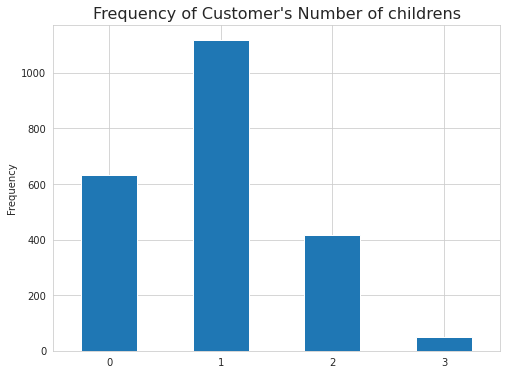

In [ ]:
# Plot the number of children (kids and teenargers) in the household of customer's
df["Num_Children"].value_counts().sort_index().plot.bar(figsize = (8, 6))
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.title("Frequency of Customer's Number of childrens", fontsize = 16);

Almost half of the total number of customers have a total of 1 children, while in the remaining half more than a quarter of the customers do not have any children at all.

## Family size

In [ ]:
# Number of members in the family customer's
df["Family_Size"].value_counts().sort_index()

1    252
2    757
3    880
4    296
5     31
Name: Family_Size, dtype: int64

In [ ]:
# Proportion of family size
df["Family_Size"].value_counts(normalize = True).sort_index()

1    0.113718
2    0.341606
3    0.397112
4    0.133574
5    0.013989
Name: Family_Size, dtype: float64

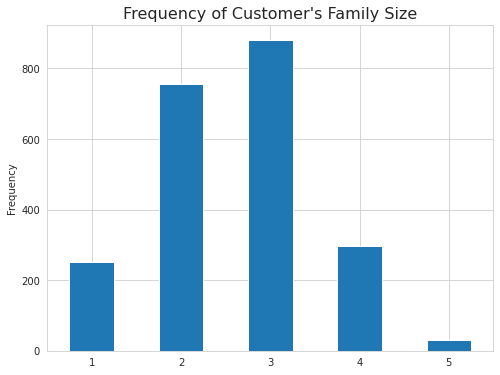

In [ ]:
# Plot the family size
df["Family_Size"].value_counts().sort_index().plot.bar(figsize = (8, 6))
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.title("Frequency of Customer's Family Size", fontsize = 16);

Thirty-four percent of the clients have no children. They live in couples or alone (family size is 2 persons). 

On the other hand, 39% of clients have 1 child and are partnered (family size 3: partner and 1 child).

## Parenthood

In [ ]:
# Parenthood in customers, 0 (False) and 1 (True)
df["Is_Parent"].value_counts().sort_index()

0     633
1    1583
Name: Is_Parent, dtype: int64

In [ ]:
# Proportion of Parenthood in customers
df["Is_Parent"].value_counts(normalize = True).sort_index()

0    0.28565
1    0.71435
Name: Is_Parent, dtype: float64

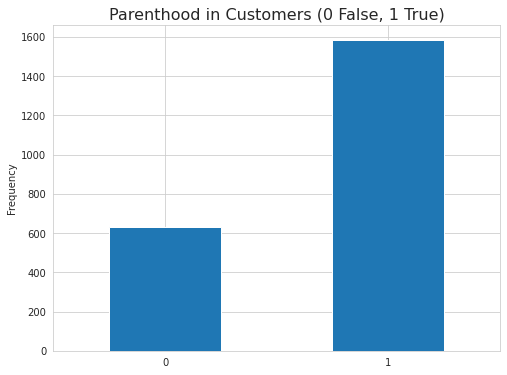

In [ ]:
# Plot the Parenthood in customers
df["Is_Parent"].value_counts().sort_index().plot.bar(figsize = (8, 6))
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.title("Parenthood in Customers (0 False, 1 True)", fontsize = 16);

71% of the customers have children, which means that most of the customers of this store are either a father or a mother.

In [ ]:
# Parenthood and marital status
df[df["Is_Parent"] == 1].Partner.value_counts()

Partner    1049
Alone       534
Name: Partner, dtype: int64

In [ ]:
# Parenthood and marital status (proportion)
df[df["Is_Parent"] == 1].Partner.value_counts(normalize = True)

Partner    0.662666
Alone      0.337334
Name: Partner, dtype: float64

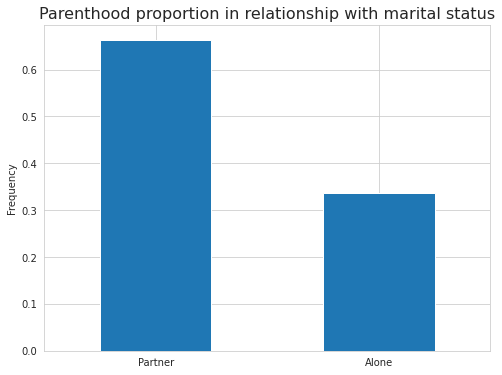

In [ ]:
# How many customers are parents and have a partner?
df[df["Is_Parent"] == 1].Partner.value_counts(normalize = True).plot.bar(figsize = (8, 6))
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.title("Parenthood proportion in relationship with marital status", fontsize = 16);

How many customers are parents and live with a partner? 1049 (66%) of the customers are parents and live with a partner, while 534 (33%) of the customers have children but do not have a partner (divorced or widowed).

This means that the majority of the customers of this shop are people who have a family (who are married and have children).

# 2. Bivariate analysis

## Age vs. Total Spent

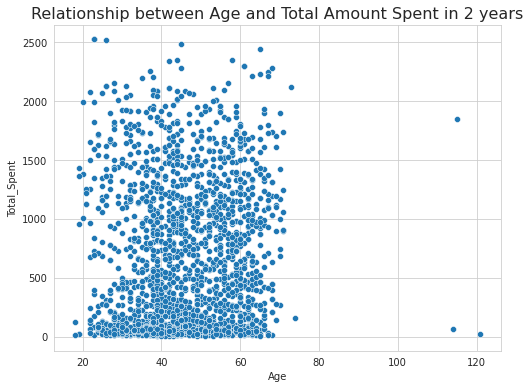

In [ ]:
# Create a scatterplot to compare Age and Total Spent
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df, x = "Age", y = "Total_Spent")
plt.title("Relationship between Age and Total Amount Spent in 2 years", fontsize = 16);

When comparing age to the total amount spent in two years, I noticed that there is no direct relationship between the two variables. This can be seen in the scatter plot, where the points are spread all over the graph. 

In other words, age does not tell us much about the amount of money customers have spent.

I will create a new column grouping customers by age range to verify the above statement.

In [ ]:
# Create different intervals for customer's age
def range_age(age):
  if age < 20:
    return "11-20"
  elif age > 20 and age < 31:
    return "21-30"
  elif age > 30 and age < 41:
    return "31-40"
  elif age > 40 and age < 51:
    return "41-50"
  elif age > 50 and age < 61:
    return "51-60"
  else:
    return ">60"

In [ ]:
# Create new column for age range
df["Age_Group"] = df["Age"].apply(range_age)

# Order the indexes
order = ["11-20", "21-30", "31-40", "41-50", "51-60", ">60"]

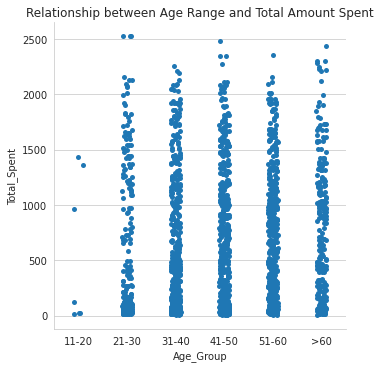

In [ ]:
# Create a graph to see how the Total Spent is distributed according to the range in age
sns.catplot(x = "Age_Group", y = "Total_Spent", data = df, order = order)
plt.title("Relationship between Age Range and Total Amount Spent", fontsize = 12);

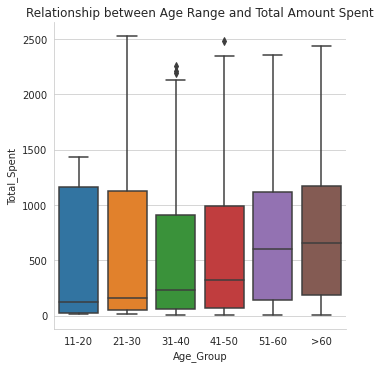

In [ ]:
# Create a graph to see how the Total Spent is distributed according to the range in age
sns.catplot(x = "Age_Group", y = "Total_Spent", data = df, order = order, kind = "box")
plt.title("Relationship between Age Range and Total Amount Spent", fontsize = 12);

## Income vs. Total Spent

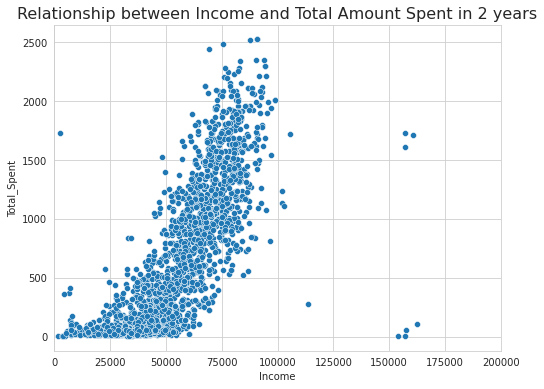

In [ ]:
# Create a scatterplot to compare Income and Total Spent
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df, x = "Income", y = "Total_Spent")
plt.title("Relationship between Income and Total Amount Spent in 2 years", fontsize = 16)
plt.xlim(0, 200_000);

According to the scatter plot, there is a correlation between income and the total amount spent in the store over two years. 

The higher the income, the higher the spending in the store.

## Education vs. Total Spent

In [ ]:
# Comparing Education vs Total Spent
# Because the distribution of the Total_Spent are skewed, I'll use the median
education_vs_spent = df.groupby("Education")["Total_Spent"].median()
education_vs_spent

Education
Graduate         414.5
Postgraduate     427.0
Undergraduate     96.0
Name: Total_Spent, dtype: float64

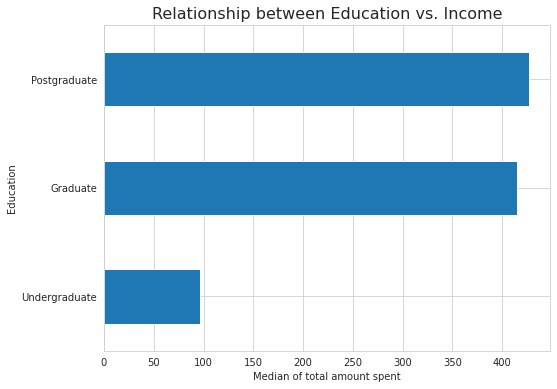

In [ ]:
# Plot the Educations vs. Total_Spent relationship
education_vs_spent.sort_values(ascending = True).plot.barh(figsize = (8, 6))
plt.xlabel("Median of total amount spent")
plt.title("Relationship between Education vs. Income", fontsize = 16);

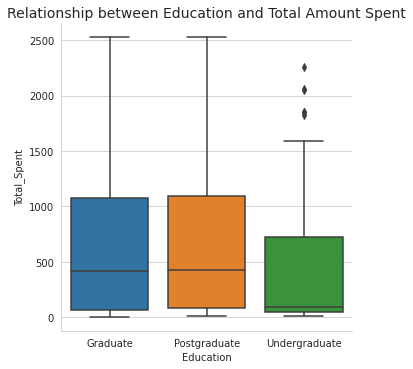

In [ ]:
# Create a graph to see how the Total Spent is distributed according to the Education
sns.catplot(x = "Education", y = "Total_Spent", data = df, kind = "box")
plt.title("Relationship between Education and Total Amount Spent", fontsize = 14);

Graduates and postgraduates spend more money in the store. Although the differences in the total amount spent between the two are not that bigger.

## Education vs. Income

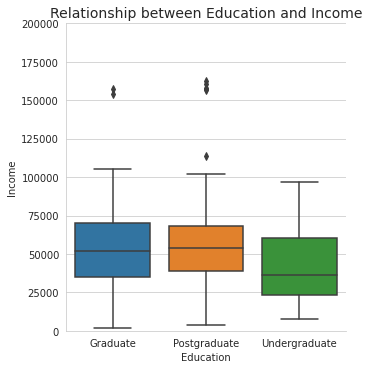

In [ ]:
# Education vs Income
sns.catplot(x = "Education", y = "Income", data = df, kind = "box")
plt.ylim(0, 200_000) # Zoom from 0 to 200k
plt.title("Relationship between Education and Income", fontsize = 14);

As expected, clients with higher education (graduates and postgraduates) earn more than non-graduates. The three aren't that different, though.

## Partner vs. Total Spent

In [ ]:
# Comparing Partner vs Total Spent
# Because the distribution of the Total_Spent are skewed, I'll use the median
df.groupby("Partner")["Total_Spent"].median()

Partner
Alone      399.0
Partner    395.5
Name: Total_Spent, dtype: float64

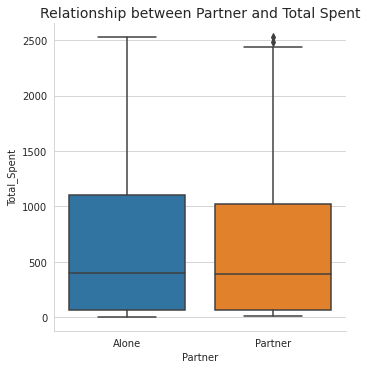

In [ ]:
# Partner vs. Total Spent
sns.catplot(x = "Partner", y = "Total_Spent", data = df, kind = "box")
plt.title("Relationship between Partner and Total Spent", fontsize = 14);

The average spend between customers with a partner and those without is virtually the same. 

## Number of children vs. Total Spent

In [ ]:
# Comparing Number of children vs Total Spent
df.groupby("Num_Children")["Total_Spent"].median()

Num_Children
0    1189.0
1     306.0
2      93.5
3      79.5
Name: Total_Spent, dtype: float64

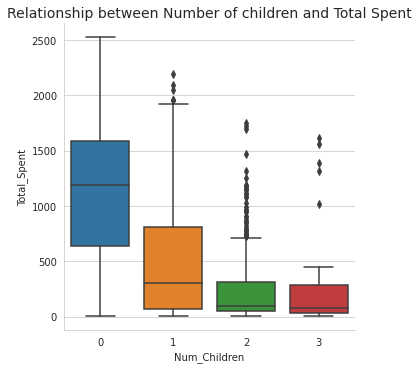

In [ ]:
# Number of children vs. Total Spent
sns.catplot(x = "Num_Children", y = "Total_Spent", data = df, kind = "box")
plt.title("Relationship between Number of children and Total Spent", fontsize = 14);

Customers without children spend more in the store than those with children. 

According to the graph above, the more children a customer has, the less he/she spends in the store.


## Family size vs. Total Spent

In [ ]:
# Comparin Family size with total spent
df.groupby("Family_Size")["Total_Spent"].median()

Family_Size
1    1188.5
2     746.0
3     239.0
4      91.5
5      88.0
Name: Total_Spent, dtype: float64

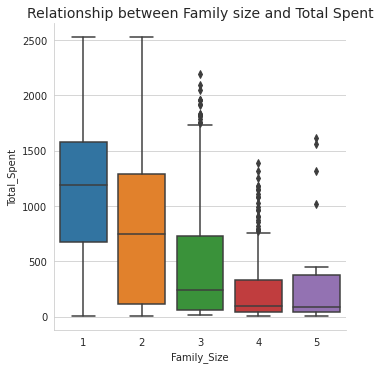

In [ ]:
# Family size vs. Total Spent
sns.catplot(x = "Family_Size", y = "Total_Spent", data = df, kind = "box")
plt.title("Relationship between Family size and Total Spent", fontsize = 14);

Comparing the size of the client's family with the total amount spent, a distribution similar to the number of children is observed (comparison made in the previous section). This is not surprising, since the size of the family is a feature that groups the number of children with the marital situation of the clients.

Customers without a partner (with a family size of 0) spend more in the store, but this amount is variable. As the number of family members increases, spending decreases.

Finally, some outliers are observed in the family sizes 3 and 4, indicating the variability of these features.

# 3. Multivariate analysis

## Education vs Income vs Total amount spent

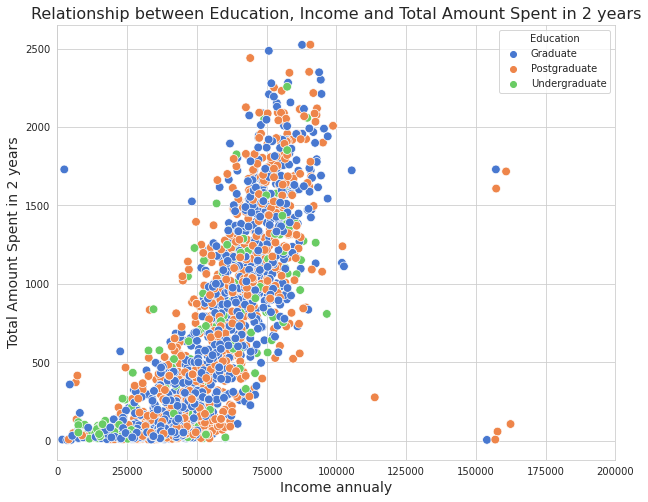

In [63]:
# Create a scatterplot to compare Education, Income and Total Spent
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = "Income", y = "Total_Spent", hue = "Education", palette = "muted", s = 75)
plt.title("Relationship between Education, Income and Total Amount Spent in 2 years", fontsize = 16)
plt.xlabel("Income annualy", size = 14)
plt.ylabel("Total Amount Spent in 2 years", size = 14)
plt.xlim(0, 200_000);

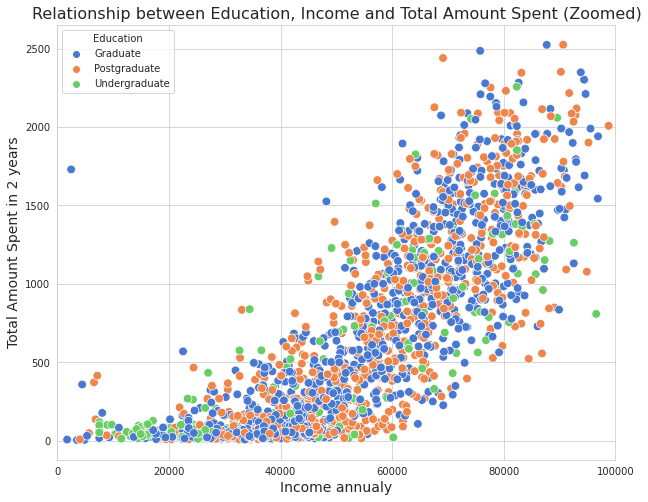

In [74]:
# Create a scatterplot to compare Education, Income and Total Spent
# ZOOM IN
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = "Income", y = "Total_Spent", hue = "Education", palette = "muted", s = 75)
plt.title("Relationship between Education, Income and Total Amount Spent (Zoomed)", fontsize = 16)
plt.xlabel("Income annualy", size = 14)
plt.ylabel("Total Amount Spent in 2 years", size = 14)
plt.xlim(0, 100_000);

According to the scatterplot, undergraduate clients have a small difference in how much they earn (it is less) and spend less compared to graduate and postgraduate clients. The latter (Graduates and Postgraduates) two are evenly distributed.

## Number of children vs Income vs Total spent

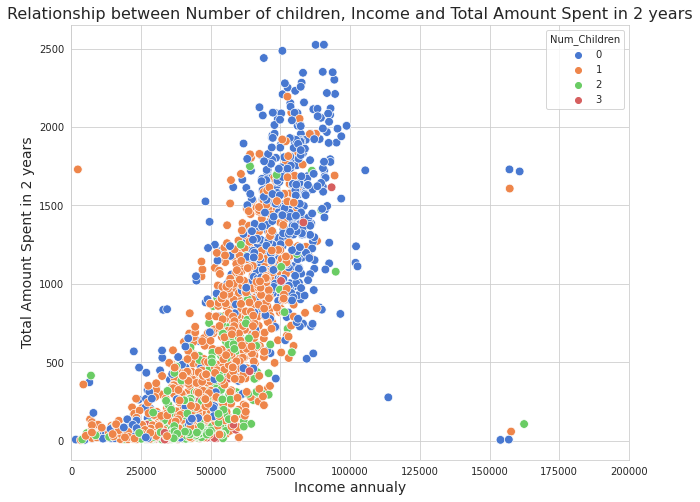

In [66]:
# Create a scatterplot to compare Number of children, Income and Total Spent
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = "Income", y = "Total_Spent", hue = "Num_Children", palette = "muted", s = 75)
plt.title("Relationship between Number of children, Income and Total Amount Spent in 2 years", fontsize = 16)
plt.xlabel("Income annualy", size = 14)
plt.ylabel("Total Amount Spent in 2 years", size = 14)
plt.xlim(0, 200_000);

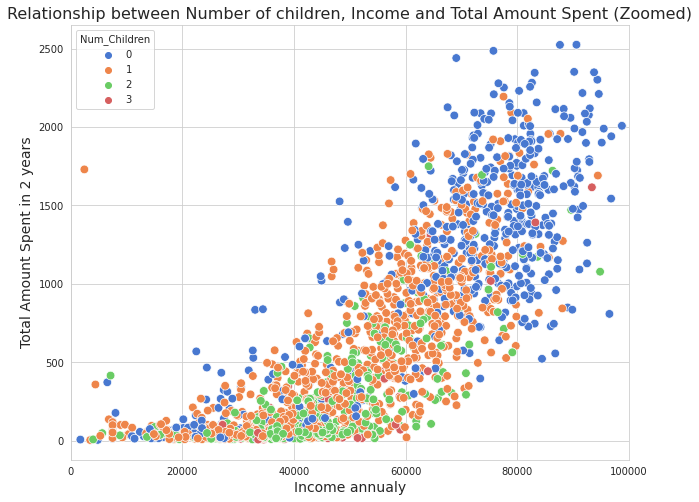

In [73]:
# Create a scatterplot to compare Number of children, Income and Total Spent
# ZOOM IN
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = "Income", y = "Total_Spent", hue = "Num_Children", palette = "muted", s = 75)
plt.title("Relationship between Number of children, Income and Total Amount Spent (Zoomed)", fontsize = 16)
plt.xlabel("Income annualy", size = 14)
plt.ylabel("Total Amount Spent in 2 years", size = 14)
plt.xlim(0, 100_000);

Looking at the scatterplot, customers who do not have children (`Num_Children = 0`) spend more money in addition to having a higher annual income compared to those who have children.

It is also observed that the higher the number of children, the lower the expenses in the store. This feature is very helpful when performing clustering, as it allows the clusters to be clearly separated.

## Family size vs Income vs Total amount spent

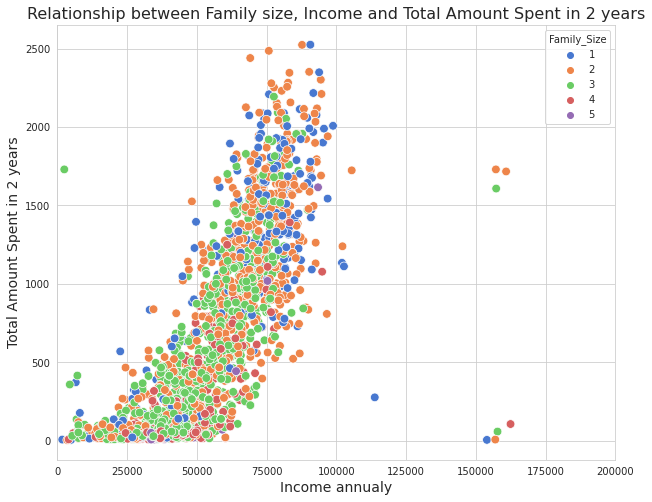

In [70]:
# Create a scatterplot to compare Family size, Income and Total Spent
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = "Income", y = "Total_Spent", hue = "Family_Size", palette = "muted", s = 75)
plt.title("Relationship between Family size, Income and Total Amount Spent in 2 years", fontsize = 16)
plt.xlabel("Income annualy", size = 14)
plt.ylabel("Total Amount Spent in 2 years", size = 14)
plt.xlim(0, 200_000);

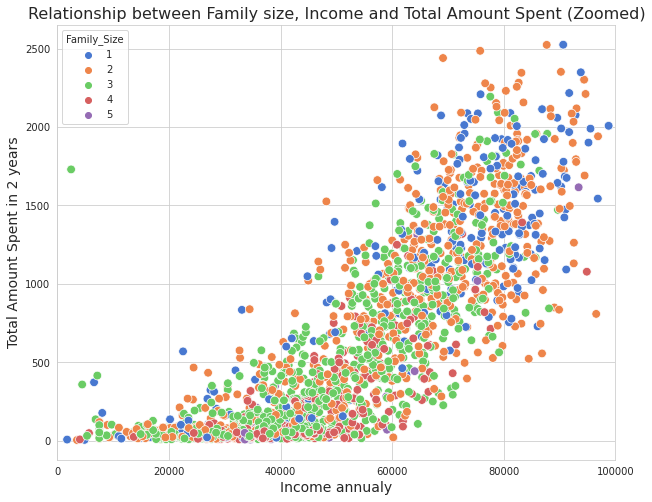

In [75]:
# Create a scatterplot to compare Family size, Income and Total Spent
# ZOOMED
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = "Income", y = "Total_Spent", hue = "Family_Size", palette = "muted", s = 75)
plt.title("Relationship between Family size, Income and Total Amount Spent (Zoomed)", fontsize = 16)
plt.xlabel("Income annualy", size = 14)
plt.ylabel("Total Amount Spent in 2 years", size = 14)
plt.xlim(0, 100_000);

In contrast to `Num_Children`, there is more variation in the data when comparing family sizes. We see that family sizes 1 and 2 (i.e. single or married but without children) tend to spend more in the store, and the larger the number of family members (more children), the lower the spending.

## Compare Partner with products

In [ ]:
# What products do customers buy based on the marital situation (Partner)?
partner_products = df.groupby("Partner")[["Meat", "Fish", "Gold", "Fruits", "Sweets"]].mean()
partner_products

,Meat,Fish,Gold,Fruits,Sweets
Partner,,,,,
Alone,174.047074,38.965649,45.743003,27.750636,27.912214
Partner,163.120280,36.907692,42.988112,25.589510,26.543357


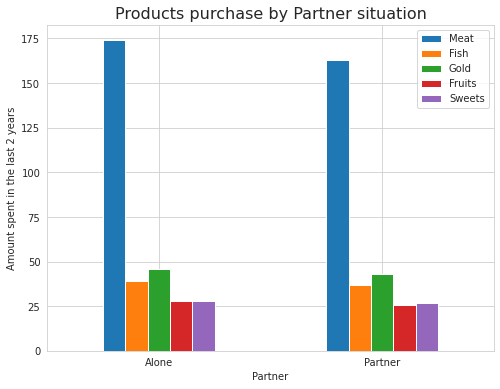

In [ ]:
# Plot the products purchase by Partner
partner_products.plot.bar(figsize = (8, 6))
plt.ylabel("Amount spent in the last 2 years")
plt.xticks(rotation = 0)
plt.title("Products purchase by Partner situation", fontsize = 16);

Customers spend more on meat than on other items in the store. The number of products purchased by customers is not affected by the partner situation.

## Compare Education with products

In [ ]:
# What products do customers buy based on Education?
education_products = df.groupby("Education")[["Meat", "Fish", "Gold", "Fruits", "Sweets"]].mean()
education_products

,Meat,Fish,Gold,Fruits,Sweets
Education,,,,,
Graduate,180.393369,43.416667,50.683692,30.861111,31.285842
Postgraduate,166.796690,28.868794,35.762411,20.676123,20.546099
Undergraduate,108.795276,41.452756,41.767717,25.480315,29.917323


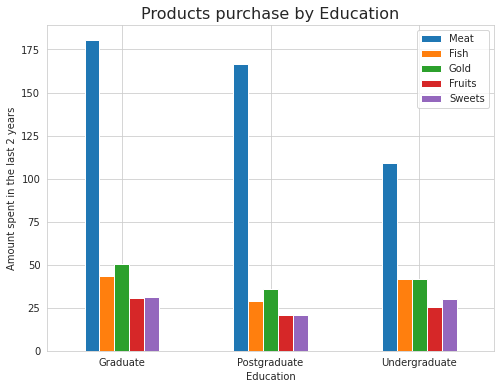

In [ ]:
# Plot the products purchase by Education
education_products.plot.bar(figsize = (8, 6))
plt.ylabel("Amount spent in the last 2 years")
plt.xticks(rotation = 0)
plt.title("Products purchase by Education", fontsize = 16);

Customer education does not affect the number of products purchased.

## Compare Number of chidren with products

In [ ]:
# What products do customers buy based on the number of children they have?
products_per_number_children = df.groupby("Num_Children")[["Meat", "Fish", "Gold", "Fruits", "Sweets"]].mean()
products_per_number_children

,Meat,Fish,Gold,Fruits,Sweets
Num_Children,,,,,
0,370.865719,76.619273,64.235387,52.274882,53.180095
1,99.212175,26.806625,40.531782,19.469114,20.163832
2,51.692308,11.283654,25.447115,7.858173,8.307692
3,59.620000,5.360000,18.120000,5.980000,5.080000


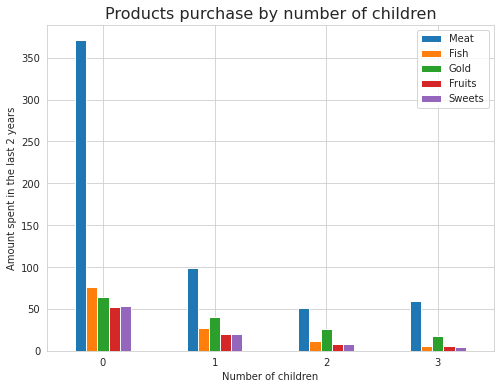

In [ ]:
# Plot the products purchase by number of children
products_per_number_children.plot.bar(figsize = (8, 6))
plt.xlabel("Number of children")
plt.ylabel("Amount spent in the last 2 years")
plt.xticks(rotation = 0)
plt.title("Products purchase by number of children", fontsize = 16);

Customers spend more on meat than on other items in the store.

Customers without children spend much more (three times) on meat products than those with children.

# Conclusions

After conducting the exploratory analysis of the data, I found that the customers who spent the most in the store in the last two years were those without children and those with postgraduate degrees. 

Customers with children spent less than those without children, and the higher the number of children, the lower the store spending. This may be due to the fact that families are more modest in their daily spending.

Customers with a graduate degree spent more (three times more) than customers without a graduate or bachelor's degree. This is because clients with a graduate degree brought in more money than clients without a degree.

The product that generated the most sales was meat products, followed by gold and fish. This behavior was observed for all customers, regardless of their marital status or number of children.

The main indicators that determined the amount spent by the clients were: 
* Income;
* Education;
* Total Amount Spent;
* Number of Children. 

These four characteristics will be used to segment clients in the next notebook.